<a href="https://colab.research.google.com/github/alwinrioo/DISEASE/blob/main/DISEASE%20DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cardio_train.csv to cardio_train (2).csv
Accuracy Score: 0.7129285714285715

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Confusion Matrix:
 [[5057 1931]
 [2088 4924]]

Predictions saved to: /content/prediction_results_labeled.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

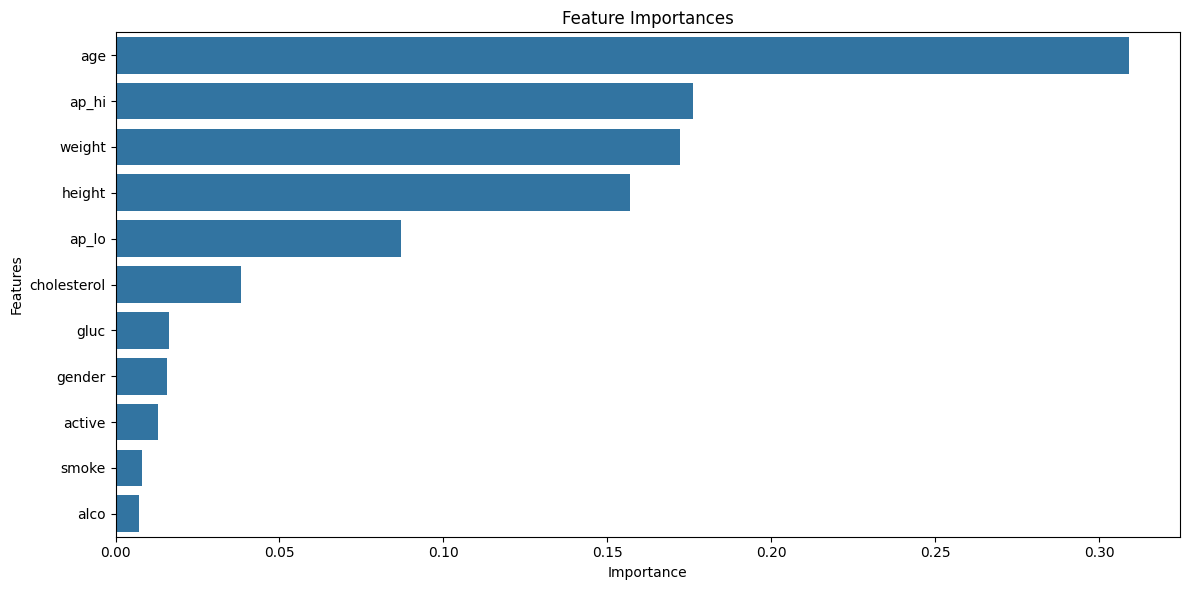

In [8]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Upload and load dataset (filename handled dynamically)
from google.colab import files
uploaded = files.upload()  # Upload your .csv file

import io
filename = list(uploaded.keys())[0]  # Automatically get uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';')

# 3. Drop 'id' column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# 4. Drop rows with missing target values (if any)
df.dropna(subset=['cardio'], inplace=True)

# 5. Define features and target
X = df.drop('cardio', axis=1)
y = df['cardio']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 9. Make predictions
y_pred = model.predict(X_test_scaled)

# 10. Evaluate model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 11. Save predictions with readable labels
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

# Mapping 0 and 1 to human-readable labels
label_map = {0: "Low Risk", 1: "High Risk"}
results['Actual Label'] = results['Actual'].map(label_map)
results['Predicted Label'] = results['Predicted'].map(label_map)

# Optional: Drop raw numeric labels
results_to_save = results.drop(columns=['Actual', 'Predicted'])

# Save to CSV
output_path = '/content/prediction_results_labeled.csv'
results_to_save.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")

# Download CSV file in Colab
files.download(output_path)

# 12. Feature importance plot
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
